In [1]:
import json
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
df_main = pd.read_csv("df_main5.csv")
df_refer = pd.read_csv("df_refer3.csv")

In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sentiment_score = []
for index, row in df_main.iterrows():
    text = row['abstract']
    sentiment = sia.polarity_scores(text)
    sentiment_score.append(sentiment)
    
df_main['sentiment'] = sentiment_score

In [10]:
sent_neg =[]
for x in df_main['sentiment']:
    negative = x['neg']
    sent_neg.append(negative)

df_main['negative'] = sent_neg

In [12]:
sent_pos =[]
for x in df_main['sentiment']:
    positive = x['pos']
    sent_pos.append(positive)

df_main['positive'] = sent_pos

In [14]:
df_main.drop(['BoW_Cos_x',	'BoW_Euc_x',	'BoW_Jac_x',	'tfidf_Cos_x',	
             'tfidf_Euc_x',	'tfidf_Jac_x',	'w2v_Cos_x',	'BoW_Cos_y',	'BoW_Euc_y',	
             'BoW_Jac_y',	'tfidf_Cos_y',	'tfidf_Euc_y',	'tfidf_Jac_y',	'w2v_Cos_y',
             'BoW_Cos',	'BoW_Euc',	'BoW_Jac',	'tfidf_Cos',	'tfidf_Euc',	'tfidf_Jac',
             'w2v_Cos_x.1',	'w2v_Cos_y.1'], inplace = True, axis=1)

In [20]:
import matplotlib.pyplot as plt

In [22]:
df_refer.head()

,Unnamed: 0,_id,abstract,authors,n_citation,references,title,venue,year,id,ref_index,ref_abstract,ref_authors,ref_n_citation,ref_references,ref_title,ref_venue,ref_year,BoW_Jac,BoW_Cos,BoW_Euc,tfidf_Jac,tfidf_Cos,tfidf_Euc,w2v_Cos_x,sum_similarity_weight,weightvalue,weighted_avg_ref_citations
0,0,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,6b19b1e6-81c5-4039-8a70-f3a2797f5447,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,The combination of hardware acceleration and f...,"['Heather Quinn', 'Laurie A. Smith King', 'Mir...",50,"['115b9e24-0791-4251-8777-24c38fea952f', '430c...",Runtime assignment of reconfigurable hardware ...,field programmable custom computing machines,2003,30.00,50.53,-22.8537,95.65,35.83,-13.29,97.833942,386.915432,4891.697105,12.642807
1,1,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,8823b473-17c0-4f1f-a084-f86ae4b29e63,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,This work presents a new scene change detectio...,"['Edmundo Saez', 'José Ignacio Benavides', 'Ni...",12,"['181e1f31-1580-454c-bdb8-7e46839d453d', '53fe...",Reliable real time scene change detection in M...,international conference on multimedia and expo,2004,37.50,40.34,-15.1555,93.75,27.34,-20.55,95.954598,386.915432,1151.455178,2.975987
2,2,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,b9e545cf-0862-4ad2-873c-92740caca989,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,We discuss the use of Field Programmable Gate ...,"['Reid B. Porter', 'Kevin P. Mccabe', 'Neil W....",50,"['2633935f-57cc-40ad-9ee4-6dcb72aae169', '6a6b...",An applications approach to evolvable hardware,NaN,1999,28.57,44.90,-13.3875,93.75,31.00,-17.47,97.354730,386.915432,4867.736494,12.580880
3,3,NaN,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,ea135772-baf4-4fca-b689-7e0bf2861a2b,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,NaN,A parallel images processing field programmabl...,"['Takeaki Sugimura', 'JeoungChill Shim', 'Hiro...",7,['28f5ffcb-1076-49d0-9cf0-8a64694e2f67'],Parallel image processing field programmable g...,field-programmable technology,2003,28.57,39.51,-14.0000,93.75,27.00,-20.83,95.772162,386.915432,670.405134,1.732692
4,4,NaN,In this paper an approach to the performance a...,"['Srđan Jovković', 'Stefan Panic', 'Mihajlo C....",50,11a9d4ce-e21c-4f59-bf52-e2cc3b52de45,Performance analysis of SSC diversity receiver...,Eurasip Journal on Wireless Communications and...,2010,a024dd21-83ad-4def-bfa5-8f714f502687,NaN,This paper describes a method of deriving chan...,"['Klaus Witrisal', 'Yong-Ho Kim', 'Ramjee Pras...",79,"['47b6b7ee-1947-453a-b664-e2e1f9f31def', '7291...",A new method to measure parameters of frequenc...,IEEE Transactions on Communications,2001,54.55,51.55,-27.1780,95.45,38.91,-10.54,97.863651,778.884893,7731.228403,9.926022


<AxesSubplot:>

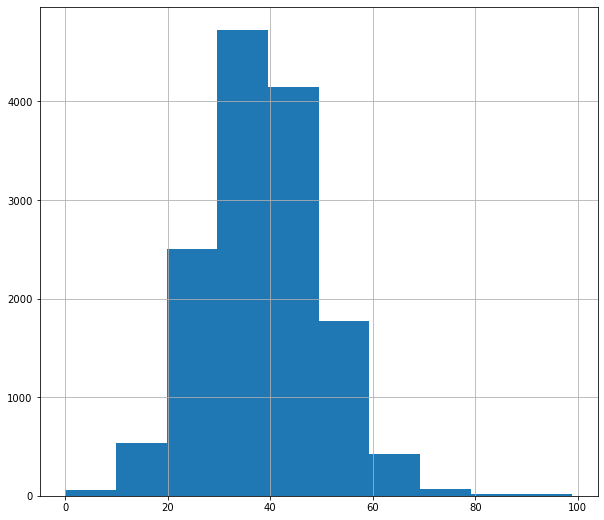

In [24]:
df_refer['tfidf_Cos'].hist(figsize=(10,9)) #looks pretty normal

In [16]:
mean_similarity = pd.pivot_table(df_refer, values=['BoW_Cos','tfidf_Cos'], 
                                                    index=['id'], columns=None, aggfunc='mean')

df_main = pd.merge(df_main, mean_similarity,  on='id')

In [17]:
sd_similarity = pd.pivot_table(df_refer, values=['BoW_Cos','tfidf_Cos'], 
                                                    index=['id'], columns=None, aggfunc='std')
df_main = pd.merge(df_main, sd_similarity,  on='id')

In [19]:

df_main.rename(columns= {'BoW_Cos_x': 'mean_BoW_Cos', 	'tfidf_Cos_x':'mean_tfidf_Cos',	
                         'BoW_Cos_y':'sd_Bow_Cos', 'tfidf_Cos_y': 'sd_tfidf_Cos'}, inplace=True)

<AxesSubplot:>

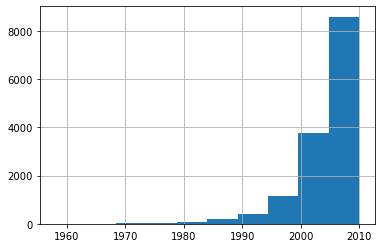

In [26]:
df_refer['ref_year'].hist() #not normal at all. 

In [27]:
med_ref_year = pd.pivot_table(df_refer, values=['ref_year'], 
                                                    index=['id'], columns=None, aggfunc='median')

df_main = pd.merge(df_main, med_ref_year,  on='id')

In [28]:
skew_ref_year = pd.pivot_table(df_refer, values=['ref_year'], 
                                                    index=['id'], columns=None, aggfunc='skew')

df_main = pd.merge(df_main, skew_ref_year,  on='id')

In [29]:
df_main.head(0)

,Unnamed: 0,_id,abstract,authors,n_citation,references_x,title,venue,year,id,mean_ref_year,max_ref_year,title_len,n_authors,n_references,ab_len,title_meta,title_review,impact_1y,weighted_avg_ref_citations_y,sentiment,negative,positive,mean_BoW_Cos,mean_tfidf_Cos,sd_Bow_Cos,sd_tfidf_Cos,ref_year_x,ref_year_y


In [30]:
df_main.rename(columns= {'ref_year_x': 'med_ref_year', 	'ref_year_y':'skew_ref_year'}, inplace=True)

In [32]:
#LDA Topic modeling
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from pprint import pprint

[nltk_data] Downloading package stopwords to /Users/ham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words


In [39]:
import gensim.corpora as corpora

LDA_topics = []
for index, row in df_main.iterrows():
    text = row['abstract']
    clean = preprocess(text)
    id2word = corpora.Dictionary([clean])
    corpus = [id2word.doc2bow(tokens) for tokens in [clean]]
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

    doc_lda = lda_model.print_topics(num_topics=5)
    LDA_topics.append(doc_lda)

df_main['LDA_topics'] = LDA_topics



In [40]:
df_main['LDA_topics'].head()
#don't know what to do with this

0    [(0, 0.016*"similarities" + 0.016*"concurrent"...
1    [(0, 0.016*"pdf" + 0.016*"keying" + 0.016*"sym...
2    [(0, 0.015*"design" + 0.014*"understand" + 0.0...
3    [(0, 0.029*"stereo" + 0.029*"approach" + 0.029...
4    [(0, 0.022*"order" + 0.022*"method" + 0.022*"s...
Name: LDA_topics, dtype: object

In [41]:
df_main.to_csv("df_main6.csv")